In [498]:
from PIL import Image, ImageOps
import numpy as np
import math as m
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

In [499]:
train_live_raw = glob('/Users/rohitrameshwaram/Desktop/Machine Learning/HomeWork2/Spoof_data/Training Biometrika Live/live/*.png')
train_spoof_raw = glob('/Users/rohitrameshwaram/Desktop/Machine Learning/HomeWork2/Spoof_data/Training Biometrika Spoof/Training Biometrika Spoof/spoof/*.png')
test_live_raw = glob('/Users/rohitrameshwaram/Desktop/Machine Learning/HomeWork2/Spoof_data/Testing Biometrika Live/live/*png')
test_spoof_raw = glob('/Users/rohitrameshwaram/Desktop/Machine Learning/HomeWork2/Spoof_data/Testing Biometrika Spoof/Testing Biometrika Spoof/spoof/*png')

train_live = [np.asarray(ImageOps.grayscale(Image.open(image)))/255 for image in train_live_raw]
train_spoof = [np.asarray(ImageOps.grayscale(Image.open(image)))/255 for image in train_spoof_raw]
test_live = [np.asarray(ImageOps.grayscale(Image.open(image)))/255 for image in test_live_raw]
test_spoof = [np.asarray(ImageOps.grayscale(Image.open(image)))/255 for image in test_spoof_raw]


In [500]:
# length of the train_spoof data
len(train_spoof)

207

In [501]:
# length of the train_live data
len(train_live)

200

In [502]:
# length of the test_live data
len(test_live)

200

In [503]:
# length of the test_spoof data
len(test_spoof)

200

<h1> Training Data <h1>

In [504]:
train_data = []

In [505]:
# changing multi-dimensional array into a contiguous flattened array for train_live data.
for image in train_live:
    train_data.append(image.ravel())
    print(np.shape(image))
    print(image)

(372, 312)
[[0.27843137 0.28235294 0.28627451 ... 0.24705882 0.2627451  0.34509804]
 [0.30980392 0.29803922 0.29803922 ... 0.24705882 0.28235294 0.35686275]
 [0.29019608 0.30588235 0.29411765 ... 0.25490196 0.27058824 0.36078431]
 ...
 [0.61176471 0.61568627 0.61568627 ... 0.50588235 0.54117647 0.66666667]
 [0.60392157 0.60392157 0.6        ... 0.49803922 0.52941176 0.67843137]
 [0.61568627 0.59607843 0.60392157 ... 0.51764706 0.54901961 0.66666667]]
(372, 312)
[[0.25490196 0.24313725 0.24705882 ... 0.20784314 0.21568627 0.28627451]
 [0.2627451  0.25490196 0.25490196 ... 0.21568627 0.22745098 0.29019608]
 [0.25098039 0.26666667 0.25882353 ... 0.22745098 0.23137255 0.30196078]
 ...
 [0.49019608 0.50980392 0.52156863 ... 0.42352941 0.45882353 0.55294118]
 [0.49803922 0.50980392 0.49803922 ... 0.42352941 0.44313725 0.56078431]
 [0.51372549 0.50588235 0.49019608 ... 0.42352941 0.45882353 0.5372549 ]]
(372, 312)
[[0.26666667 0.25490196 0.25490196 ... 0.21176471 0.23137255 0.30980392]
 [0.27

 [0.21176471 0.10196078 0.08235294 ... 0.48627451 0.50588235 0.61568627]]
(372, 312)
[[0.25490196 0.25882353 0.2627451  ... 0.22745098 0.24313725 0.29803922]
 [0.27843137 0.27843137 0.2745098  ... 0.21960784 0.24313725 0.30196078]
 [0.26666667 0.27843137 0.2745098  ... 0.24313725 0.24313725 0.31372549]
 ...
 [0.54117647 0.52941176 0.54117647 ... 0.45098039 0.49019608 0.57254902]
 [0.5254902  0.52941176 0.53333333 ... 0.45882353 0.49019608 0.56862745]
 [0.52156863 0.52941176 0.53333333 ... 0.45882353 0.48235294 0.56862745]]
(372, 312)
[[0.28235294 0.2745098  0.2745098  ... 0.22745098 0.23921569 0.30980392]
 [0.29019608 0.2745098  0.27843137 ... 0.23137255 0.25098039 0.32156863]
 [0.28627451 0.29803922 0.28627451 ... 0.25490196 0.25098039 0.32156863]
 ...
 [0.59215686 0.58431373 0.59215686 ... 0.47058824 0.50588235 0.59215686]
 [0.56470588 0.57254902 0.57647059 ... 0.4627451  0.49411765 0.61176471]
 [0.56862745 0.54901961 0.56862745 ... 0.47058824 0.49019608 0.59607843]]
(372, 312)
[[0.2

In [506]:
# changing multi-dimensional array into a contiguous flattened array for train_spoof data.
for image in train_spoof:
    train_data.append(image.ravel())
    print(np.shape(image))
    print(image)

(372, 312)
[[0.27843137 0.2627451  0.2745098  ... 0.22745098 0.24705882 0.32156863]
 [0.29803922 0.2627451  0.2745098  ... 0.23921569 0.26666667 0.32941176]
 [0.2745098  0.27843137 0.27843137 ... 0.25098039 0.25098039 0.33333333]
 ...
 [0.59215686 0.56862745 0.54901961 ... 0.48235294 0.51764706 0.61568627]
 [0.58039216 0.55686275 0.56078431 ... 0.49019608 0.49411765 0.62352941]
 [0.57647059 0.55686275 0.56470588 ... 0.4745098  0.49411765 0.62352941]]
(372, 312)
[[0.2745098  0.2627451  0.2745098  ... 0.22745098 0.24705882 0.32941176]
 [0.29019608 0.28627451 0.27843137 ... 0.23137255 0.25882353 0.3254902 ]
 [0.28235294 0.29019608 0.28235294 ... 0.23921569 0.25882353 0.34901961]
 ...
 [0.59215686 0.57647059 0.57254902 ... 0.45882353 0.50980392 0.61176471]
 [0.57647059 0.58039216 0.55686275 ... 0.4745098  0.50196078 0.62352941]
 [0.59215686 0.56470588 0.56470588 ... 0.4627451  0.50196078 0.61176471]]
(372, 312)
[[0.24313725 0.23921569 0.25098039 ... 0.20784314 0.22352941 0.30196078]
 [0.26

[[0.27058824 0.2627451  0.27843137 ... 0.21568627 0.25098039 0.3372549 ]
 [0.28235294 0.27058824 0.2627451  ... 0.23137255 0.2627451  0.34901961]
 [0.2745098  0.28627451 0.27843137 ... 0.25490196 0.25882353 0.35294118]
 ...
 [0.56078431 0.54901961 0.56470588 ... 0.45490196 0.49803922 0.60784314]
 [0.56078431 0.56078431 0.56078431 ... 0.45490196 0.47058824 0.62745098]
 [0.56862745 0.55686275 0.56078431 ... 0.44705882 0.47058824 0.60392157]]
(372, 312)
[[0.26666667 0.25882353 0.27058824 ... 0.22745098 0.23921569 0.31764706]
 [0.28627451 0.2745098  0.2745098  ... 0.23137255 0.25490196 0.33333333]
 [0.27058824 0.27843137 0.2745098  ... 0.24313725 0.23921569 0.34117647]
 ...
 [0.58823529 0.56862745 0.56078431 ... 0.4627451  0.51372549 0.61568627]
 [0.56078431 0.56078431 0.54117647 ... 0.47058824 0.48627451 0.62352941]
 [0.56862745 0.55686275 0.55686275 ... 0.4627451  0.49411765 0.61176471]]
(372, 312)
[[0.25882353 0.25490196 0.26666667 ... 0.20784314 0.23921569 0.31372549]
 [0.28235294 0.25

[[0.2627451  0.25882353 0.25882353 ... 0.21176471 0.22352941 0.31372549]
 [0.27843137 0.25882353 0.27058824 ... 0.21960784 0.25490196 0.33333333]
 [0.27058824 0.2745098  0.25882353 ... 0.23137255 0.23921569 0.3372549 ]
 ...
 [0.57254902 0.55686275 0.54117647 ... 0.45098039 0.50588235 0.61960784]
 [0.57254902 0.55294118 0.53333333 ... 0.4627451  0.48627451 0.63529412]
 [0.56470588 0.55686275 0.54117647 ... 0.45882353 0.49019608 0.61176471]]
(372, 312)
[[0.27058824 0.25490196 0.27058824 ... 0.22352941 0.24313725 0.33333333]
 [0.28627451 0.26666667 0.27058824 ... 0.23137255 0.2627451  0.34901961]
 [0.27058824 0.2745098  0.27058824 ... 0.23921569 0.25490196 0.35686275]
 ...
 [0.58431373 0.57254902 0.56470588 ... 0.48235294 0.51372549 0.63137255]
 [0.57254902 0.56078431 0.56078431 ... 0.4627451  0.50196078 0.64313725]
 [0.57254902 0.55294118 0.57254902 ... 0.4627451  0.49803922 0.63921569]]
(372, 312)
[[0.27058824 0.25098039 0.25882353 ... 0.22745098 0.23529412 0.32941176]
 [0.28235294 0.27

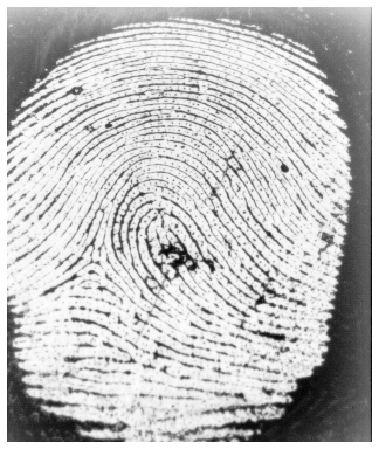

In [507]:
# checking the image from the data
plt.figure( figsize = (10,8) )
plt.axis('off')
plt.imshow(train_live[0], cmap='Greys', interpolation='nearest' )
None

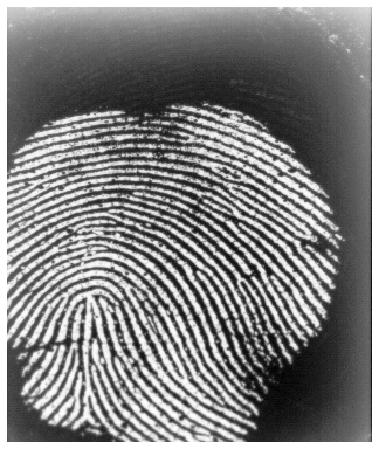

In [508]:
plt.figure( figsize = (10,8) )
plt.axis('off')
plt.imshow(train_spoof[0], cmap='Greys', interpolation='nearest' )
None

In [509]:
# creating a two empty list to store the numeric machine learning values '0' and '1'
train_live_data=[]
train_spoof_data=[]
classes = {'live': 1, 'spoof': 0}
new_class = list(classes.values())

In [510]:
for val in new_class:
    if val == 1:
        for i in range(len(train_live)):
            train_live_data.append(val)
    elif val == 0:
        for j in range(len(train_spoof)):
            train_spoof_data.append(val)
    else:
        break   

In [511]:
len(train_live_data)

200

In [512]:
len(train_spoof_data)

207

In [513]:
# concatinating the two set of lists which are created above
target = train_live_data+train_spoof_data

Target is the list that we created based on live and spoof data if the data is live we assumed it as '1' and if the data is spoof we assume it as '0'.
We have to do this process as machine learning models are solved using numeric data mostly.

In [514]:
len(target)

407

In [515]:
len(train_data)

407

This train_data is our given training data of both live and spoof we append both live and spoof to this new list by flattering the dimensions above.

In [516]:
X = train_data
y = target

In [517]:
# building SVM model for are classified data of train_data and our target
svm_model = Pipeline([
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
])
svm_model.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [518]:
svm_model.predict([X[1]])

array([1])

Checking and verifying whether our model builds working correctly or not. So, we can see that we are checking only with one image and it return the array value 1. So, as per our representation, "1" is an image of live data.

In [519]:
# values of training data and our target data
for i in range(len(X)):
    print(X[i],y[i])

[0.27843137 0.28235294 0.28627451 ... 0.51764706 0.54901961 0.66666667] 1
[0.25490196 0.24313725 0.24705882 ... 0.42352941 0.45882353 0.5372549 ] 1
[0.26666667 0.25490196 0.25490196 ... 0.44313725 0.48235294 0.58431373] 1
[0.2627451  0.25490196 0.25882353 ... 0.44705882 0.45882353 0.57647059] 1
[0.27058824 0.25882353 0.25882353 ... 0.43921569 0.46666667 0.55686275] 1
[0.25882353 0.23921569 0.24313725 ... 0.41960784 0.45882353 0.55294118] 1
[0.25490196 0.24313725 0.25098039 ... 0.41960784 0.44313725 0.54901961] 1
[0.24313725 0.23921569 0.24313725 ... 0.40784314 0.41960784 0.54509804] 1
[0.28627451 0.27058824 0.27843137 ... 0.47058824 0.49019608 0.61568627] 1
[0.25490196 0.25098039 0.24705882 ... 0.45098039 0.48235294 0.58039216] 1
[0.2745098  0.25882353 0.2627451  ... 0.43529412 0.47058824 0.57254902] 1
[0.25882353 0.23921569 0.2627451  ... 0.43137255 0.45098039 0.55294118] 1
[0.29411765 0.27843137 0.28235294 ... 0.49019608 0.5254902  0.63529412] 1
[0.25882353 0.25882353 0.27058824 ... 

[0.25882353 0.24705882 0.2627451  ... 0.45882353 0.50196078 0.61960784] 0
[0.2627451  0.25490196 0.2627451  ... 0.45490196 0.49411765 0.61960784] 0
[0.2627451  0.2627451  0.2627451  ... 0.45098039 0.48627451 0.61960784] 0
[0.27843137 0.2627451  0.27058824 ... 0.4745098  0.50980392 0.63137255] 0
[0.30196078 0.28627451 0.29411765 ... 0.50196078 0.53333333 0.67843137] 0
[0.28235294 0.2627451  0.27843137 ... 0.4745098  0.51372549 0.65098039] 0
[0.2627451  0.25098039 0.25882353 ... 0.40392157 0.43137255 0.5372549 ] 0
[0.26666667 0.25882353 0.2627451  ... 0.44313725 0.48235294 0.61176471] 0
[0.25490196 0.25098039 0.2627451  ... 0.45490196 0.47058824 0.59607843] 0
[0.24705882 0.24313725 0.24313725 ... 0.42745098 0.4627451  0.57647059] 0
[0.26666667 0.25098039 0.27058824 ... 0.4627451  0.48627451 0.60784314] 0
[0.25882353 0.2627451  0.2627451  ... 0.4745098  0.51372549 0.62352941] 0
[0.25882353 0.25098039 0.25098039 ... 0.4627451  0.48627451 0.61176471] 0
[0.25882353 0.26666667 0.27058824 ... 

In [520]:
svm_model.score(X,y)*100

100.0

Our SVM model is built on the training data and the score we got for it is 100%. Now we have to check this model with the test data and find out the scores.

<h1> Test Data <h1>

In [521]:
# defining and empty list of test_data
test_data = []

In [522]:
# appending both test_live and test_spoof data into the defined list
for image in test_live:
    test_data.append(image.ravel())
for image in test_spoof:
    test_data.append(image.ravel())

In [523]:
len(test_data)

400

In [524]:
test_live_data=[]
test_spoof_data=[]
classes_1 = {'live': 1, 'spoof': 0}
new_class_1 = list(classes_1.values())

In [525]:
for val in new_class_1:
    if val == 1:
        for i in range(len(test_live)):
            test_live_data.append(val)
    elif val == 0:
        for j in range(len(test_spoof)):
            test_spoof_data.append(val)
    else:
        break   

In [526]:
len(test_live_data)

200

In [527]:
len(test_spoof_data)

200

In [528]:
target_test = test_live_data+test_spoof_data

In [529]:
len(target_test)

400

In [530]:
X_test = test_data
y_test = target_test

In [531]:
result = svm_model.predict(X_test)

In [532]:
print('\033[1m' + '|image test data |target values of the data|'+ '\033[0m')
for i in range(len(target_test)):
    print('-------------------------')
    print("   ",result[i],"\t\t",'|',"    ",target_test[i])
    
    

|image test data |target values of the data|
-------------------------
    0 		 |      1
-------------------------
    1 		 |      1
-------------------------
    1 		 |      1
-------------------------
    1 		 |      1
-------------------------
    0 		 |      1
-------------------------
    1 		 |      1
-------------------------
    0 		 |      1
-------------------------
    1 		 |      1
-------------------------
    0 		 |      1
-------------------------
    0 		 |      1
-------------------------
    1 		 |      1
-------------------------
    1 		 |      1
-------------------------
    1 		 |      1
-------------------------
    1 		 |      1
-------------------------
    1 		 |      1
-------------------------
    1 		 |      1
-------------------------
    0 		 |      1
-------------------------
    1 		 |      1
-------------------------
    1 		 |      1
-------------------------
    0 		 |      1
-------------------------
    1 		 |      1
-------------------------
    1

    0 		 |      0
-------------------------
    0 		 |      0
-------------------------
    0 		 |      0
-------------------------
    0 		 |      0
-------------------------
    0 		 |      0
-------------------------
    0 		 |      0
-------------------------
    0 		 |      0
-------------------------
    0 		 |      0
-------------------------
    0 		 |      0
-------------------------
    0 		 |      0
-------------------------
    0 		 |      0
-------------------------
    0 		 |      0
-------------------------
    0 		 |      0
-------------------------
    0 		 |      0
-------------------------
    0 		 |      0
-------------------------
    0 		 |      0
-------------------------
    0 		 |      0
-------------------------
    0 		 |      0
-------------------------
    0 		 |      0
-------------------------
    0 		 |      0
-------------------------
    0 		 |      0
-------------------------
    0 		 |      0
-------------------------
    0 		 |      0
--------------

From the output, we can see the values of the image data of live and spoof on the first column and on the other side the target values for the test which we defined. 

In [533]:
svm_model.score(X_test,y_test)*100

89.0

In [534]:
confusion_matrix(result,target_test)

array([[199,  43],
       [  1, 157]])

In [535]:
recall_score(result, target_test)

0.9936708860759493

In [536]:
precision_score(result, target_test)

0.785

Finally after running our test data in the SVM model we got a score of 89% where we consider a model is perfect we get the score above 75%. 
Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.
You can see that precision is simply the ratio of correct positive predictions out of all positive predictions made, or the accuracy of minority class predictions.
Our precision score is 78% which is a reasonable value but not outstanding.